In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()])) 

test =  datasets.MNIST("", train=False, download=True, transform= transforms.Compose([transforms.ToTensor()])) 

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


In [5]:
import torch.nn as nn
import torch.nn.functional as F


In [6]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
                                     
        
net = Net()
print(net)
         

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
X = torch.rand((28,28))

In [8]:
X = X.view(-1,28*28)


In [9]:
output = net(X)

In [10]:
output


tensor([[-2.2925, -2.3451, -2.1918, -2.3331, -2.2074, -2.1407, -2.4481, -2.4212,
         -2.4269, -2.2702]], grad_fn=<LogSoftmaxBackward>)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [13]:
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
        
    print(loss)
        
        

tensor(0.0858, grad_fn=<NllLossBackward>)
tensor(0.0905, grad_fn=<NllLossBackward>)
tensor(0.0188, grad_fn=<NllLossBackward>)


In [16]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct  +=1
            total  += 1
print("Accuracy:", round(correct/total, 3))
        
    

Accuracy: 0.988


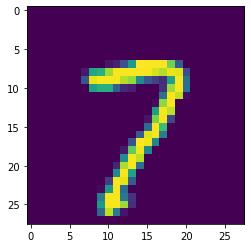

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [26]:
print(torch.argmax(net(X[3].view(-1, 784))))

tensor(7)
